# Importing useful libraries

In [1]:
# For http request
import requests
from io import BytesIO

import difflib # For finding similar string matches

import pickle # For loading the models

# For image visualization
from PIL import Image
import matplotlib.pyplot as plt

# Loading the models

In [2]:
# Let us load the movies table and the similarity vectors

with open('../models/movie_list.pkl','rb') as f:
    movies_df = pickle.load(f)

with open('../models/similairty.pkl','rb') as f:
    similarity = pickle.load(f)

In [3]:
# Let us see the loaded movies dataset

movies_df

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [4]:
# Let us see the loaded similarity 

similarity.shape

(4805, 4805)

In [5]:
# A function from the last notebook about our API request

def fetch_poster(movie_id):
    
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".\
                            format(movie_id)
    try:
        response = requests.get(url)
        response = response.json()
        image_api = "https://image.tmdb.org/t/p/w500/"
        poster_path = response['poster_path']
    except:
        return "The movie you passed doesn't exist"
    
    return image_api + poster_path

In [6]:
# Let us create a movie titles array

movie_titles = list(movies_df['title'].values)
movie_titles[:10]

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice']

In [7]:
# Let us create a function that returns movie names and their poster

def recommend(movie):
    
    try:
        
        closest_match_to_the_input = difflib.get_close_matches(movie,
                                                       movie_titles)
        movie = closest_match_to_the_input[0]
        index_ = movies_df[movies_df['title'] == movie].index[0]
    
        similaity_vec = list(enumerate(similarity[index_]))
        similarity_vec = sorted(similaity_vec,reverse=True,key = lambda x:x[1])

        recommended_movies = []
        poster_pathes = []
        
        for i in range(1,11):
            title = movies_df.loc[similarity_vec[i][0]]['title']
            movie_id = movies_df.loc[similarity_vec[i][0]]['movie_id']
            recommended_movies.append(title)
            poster_pathes.append(fetch_poster(movie_id))
            
    except:
        recommended_movies = []
        poster_pathes = []    
    
    
    return recommended_movies,poster_pathes

In [8]:
# Let us get the movie names and their poster address

movies,posters = recommend('spider man')

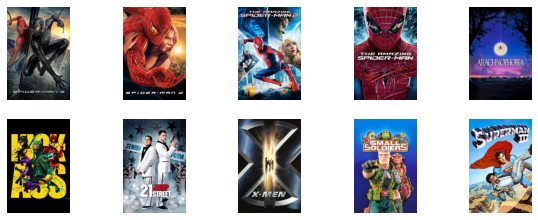

In [10]:
# Now that we got the poster addresses let us plot them

fig = plt.figure(figsize=(10,10))
for i in range(len(posters)):
    fig.add_subplot(5,5,i+1)
    response = requests.get(posters[i])
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')
plt.show()